# **Music Sentiment Analysis Using TF-IDF**

## **Project Members**
*   rr3653
*   kvn238
*   mm10435


### Importing required dependencies and files for the project.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import string
import re
from tqdm import tqdm
tqdm.pandas()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [36]:
df=pd.read_csv('/content/drive/MyDrive/spotifydata.csv')

In [ ]:
lyrics_df=pd.read_csv('/content/drive/MyDrive/MLProj/combine.csv', error_bad_lines=False)

### Data Cleaning steps for the song name, removing parts like live, remaster, demo, etc.

In [38]:
df['artist']=df['artists'].str.strip("['")
df['artist']=df['artist'].str.strip("']")
df['artist']=df['artist'].str.replace("', '"," ")

In [39]:
df2=df
df2['aname']=df2['artist'].str.lower()
df2['sname']=df2['name'].str.lower()
df2['sname']=df2['sname'].str.replace('\(live(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\(re(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\(de(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\(2(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- live(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- 2(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- de(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- re(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\[(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\{(.*)','', regex=True)
df2['sname'] = df2['sname'].map(lambda x: re.sub(r'\W+', '', x))
df2['aname']=df2['aname'].map(lambda x: re.sub(r'\W+', '', x))

df2=df2.drop_duplicates(subset=['aname', 'sname'])

In [40]:
lyrics_df['aname']=lyrics_df['ARTIST_NAME'].str.lower()
lyrics_df['aname']=lyrics_df['aname'].map(lambda x: re.sub(r'\W+', '', x))

lyrics_df['sname']=lyrics_df['SONG_NAME'].str.lower()
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(live(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(re(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(de(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(2(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- live(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- 2(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- de(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- re(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\[(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\{(.*)','', regex=True)
lyrics_df['sname'] = lyrics_df['sname'].map(lambda x: re.sub(r'\W+', '', x))

lyrics_df=lyrics_df.drop_duplicates(subset=['aname', 'sname'])

In [41]:
lyrics_df1=lyrics_df[['aname','sname','LYRICS']]


### Giving each song a sentiment based on its valence value (Valence describes the positvity of a song, the higher it is the more cheerful a song).

In [42]:
df2['sentiment'] = df2.apply(lambda row : 'Positive' if row['valence'] >= 0.67 else ('Neutral' if row['valence']>=0.33 else 'Negative'), axis = 1)

df2['sentiment_values'] = df2.apply(lambda row : 2 if row['valence'] >= 0.67 else (1 if row['valence']>=0.33 else 0), axis = 1)

sentiment_mapping={2:'Positive',
                   1:'Neutral',
                   0:'Negative'}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


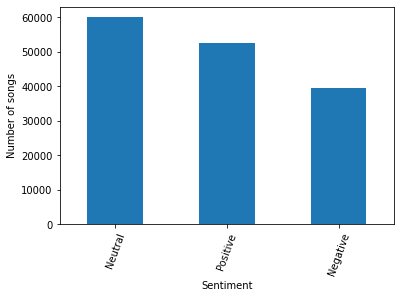

In [43]:
df2=df2.drop_duplicates()
df2['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=70)
plt.xlabel("Sentiment")
plt.ylabel("Number of songs")
plt.show()


### Additional code for scraping lyrics of a song

In [44]:
# To scrape lyrics for a song you can use this code

# from bs4 import BeautifulSoup
# import requests
# import time

# def getlyrics(aname,sname):
#   if aname[0].isalpha():
#     html_page = requests.get('https://www.lyricsondemand.com/'+aname[0]+'/'+aname+'lyrics/'+sname+'lyrics.html')
#   else:
#     html_page = requests.get('https://www.lyricsondemand.com/0/'+aname+'lyrics/'+sname+'lyrics.html')
#   if html_page:
#     soup = BeautifulSoup(html_page.content, 'html.parser')
#     results = soup.find('div', class_='lcontent')
#     if results:
#       # time.sleep(2)
#       return results.text
#   return np.nan


### Data Cleaning for the song lyrics, includes the steps:

1.   Removal of punctuations
2.   Tokenization
3.   Lemmatization
4.   Restructuring into a string

In [45]:
nltk.download('stopwords')

def remove_punct(text):
  if type(text)==str:
    no_punct="".join((c for c in text if c not in string.punctuation))
    return no_punct
  return np.nan

tokenizer=RegexpTokenizer(r'\w+')

nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

def word_lem(text):
    lem_text=[lemmatizer.lemmatize(i) for i in text]
    return lem_text

def joiner(text):
    stext=" ".join([i for i in text])
    return stext

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
proj_df=pd.merge(lyrics_df1, df2, on=['aname','sname'], how='inner')
proj_df=proj_df.drop_duplicates(subset=['aname', 'sname'])

In [47]:
proj_df['lyrics']=proj_df['LYRICS'].progress_apply(lambda x:remove_punct(x))
proj_df['lyrics']=proj_df['lyrics'].progress_apply(lambda x:tokenizer.tokenize(x.lower()))
proj_df['lyrics']=proj_df['lyrics'].progress_apply(lambda x:word_lem(x))
proj_df['lyrics']=proj_df['lyrics'].progress_apply(lambda x:joiner(x))

100%|██████████| 7733/7733 [00:00<00:00, 77201.60it/s]


### Balancing the groups of output

In [48]:
proj_df=proj_df[['aname','sname','lyrics','artist','name','valence','sentiment','sentiment_values', 'acousticness', 'danceability', 'release_date',
       'speechiness', 'tempo', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode',
       'duration_ms', 'energy']]

proj_df=proj_df.drop_duplicates(subset=['aname', 'sname'])

In [49]:
proj_df['final']=proj_df['artist']+' '+proj_df['name']+' '+proj_df['lyrics']

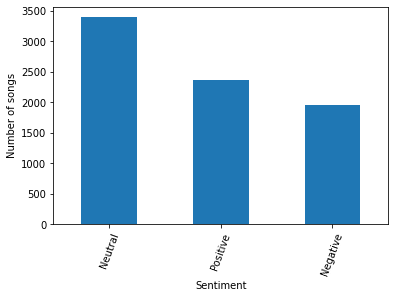

In [50]:
proj_df['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=70)
plt.xlabel("Sentiment")
plt.ylabel("Number of songs")
plt.show()

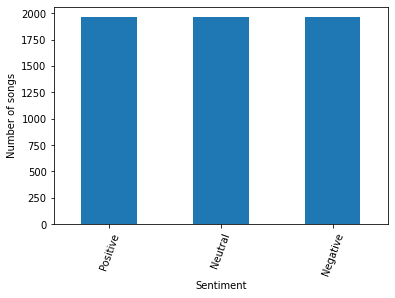

In [51]:
neg_df = proj_df.loc[proj_df['sentiment_values'] == 0].sample(n=len(proj_df.loc[proj_df['sentiment_values'] == 0]),random_state=42)
neu_df = proj_df.loc[proj_df['sentiment_values'] == 1].sample(n=len(proj_df.loc[proj_df['sentiment_values'] == 0]),random_state=42)
pos_df = proj_df.loc[proj_df['sentiment_values'] == 2].sample(n=len(proj_df.loc[proj_df['sentiment_values'] == 0]),random_state=42)
proj_df = pd.concat([neg_df,neu_df,pos_df])
proj_df=proj_df.sample(frac=1).reset_index(drop=True)


proj_df=proj_df.drop_duplicates()
proj_df['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=70)
plt.xlabel("Sentiment")
plt.ylabel("Number of songs")
plt.show()

### Creating a word cloud of the lyrics to visualize which words are associated with which sentiment

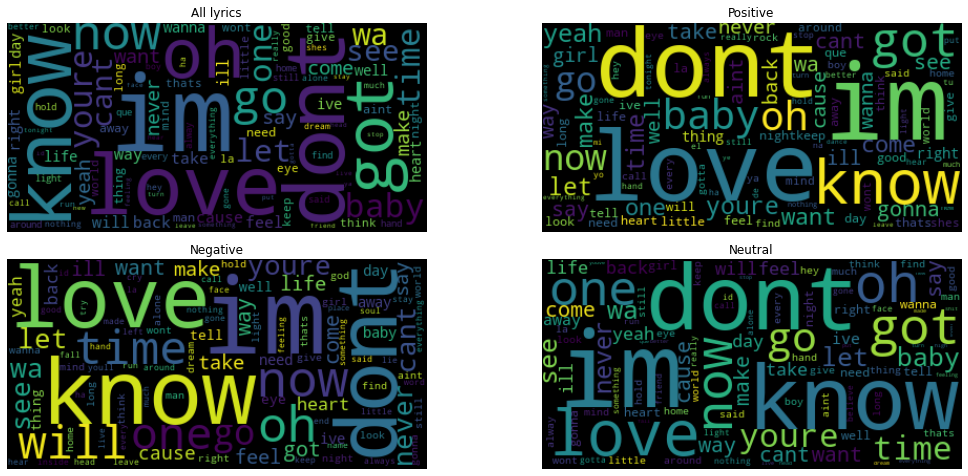

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(321)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black", collocations=False).generate_from_text(' '.join(proj_df.lyrics))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('All lyrics')
plt.axis("off")

for i,s in enumerate(proj_df.sentiment.unique()):
  plt.subplot(3,2,i+2)
  wordcloud = WordCloud(max_font_size=100, max_words=100,background_color="black",collocations=False).generate_from_text(' '.join(proj_df[proj_df['sentiment']==s].lyrics))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(s)
  plt.axis("off")

plt.tight_layout()
plt.show()

### Splitting the data into training and testing sets



In [53]:
proj_df1=proj_df.drop(columns=['sentiment','sentiment_values','valence','aname','sname','lyrics','artist','name'])
proj_df1['release_date']=proj_df1['release_date'].apply(lambda x:str(x)[:4])

In [54]:
from sklearn.model_selection import train_test_split

Xtr,Xts,Ytr,Yts=train_test_split(proj_df1,proj_df['sentiment_values'])

### Using TF-IDF to vectorize the lyrics of the training and testing datasets

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

tfid = TfidfVectorizer(
                    ngram_range = (1,1),
                    sublinear_tf = True,
                    max_features=40000)

train_tfid = tfid.fit_transform(Xtr['final'])
test_tfid = tfid.transform(Xts['final'])

### Using ML classifiers on the TF-IDF vectors only

In [56]:
acc={'SVC':0,'KNN':0,'SGD':0,'RF':0,'LR':0}

In [57]:
svc = LinearSVC()
svc.fit(train_tfid, Ytr)
yhat1 = svc.predict(test_tfid)
acc['SVC']=accuracy_score(Yts, yhat1)
print('Support Vector Classification = ',acc['SVC'])

neigh = KNeighborsClassifier()
neigh.fit(train_tfid, Ytr)
yhat1 = neigh.predict(test_tfid)
acc['KNN']=accuracy_score(Yts, yhat1)
print('KNN Classification = ',acc['KNN'])

sgd = SGDClassifier().fit(train_tfid, Ytr)
yhat1 = sgd.predict(test_tfid)
acc['SGD']=accuracy_score(Yts, yhat1)
print('SGD Classifier = ',acc['SGD'])

randfor = RandomForestClassifier()
randfor.fit(train_tfid, Ytr)
yhat1=randfor.predict(test_tfid)
acc['RF']=accuracy_score(Yts, yhat1)
print('Random Forest Classifier = ',acc['RF'])

logreg = LogisticRegression(max_iter=400)
logreg.fit(train_tfid, Ytr)
yhat1=logreg.predict(test_tfid)
acc['LR']=accuracy_score(Yts, yhat1)
print('Logistic Regression = ',acc['LR'])

Support Vector Classification =  0.44059742023082143
KNN Classification =  0.41004752206381534
SGD Classifier =  0.45010183299389
Random Forest Classifier =  0.46707399864222676
Logistic Regression =  0.4684317718940937


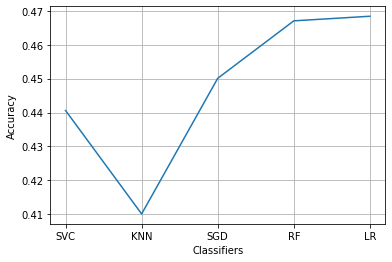

In [58]:
plt.plot(list(acc.keys()),list(acc.values()))
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid()

### Using ML classifiers with lyrics and other parameters of a song as well

In [59]:
Xtr1=Xtr.drop(columns=['final'])
Xts1=Xts.drop(columns=['final'])

In [60]:
sc=StandardScaler()
X_scaled_tr = sc.fit_transform(Xtr1)
X_scaled_t = sc.transform(Xts1)

In [61]:
logreg = LogisticRegression(max_iter=400)
logreg.fit(X_scaled_tr, Ytr)
yhat=logreg.predict(X_scaled_t)
acc['LR']=accuracy_score(Yts, yhat)
print('Logistic Regression = ',acc['LR'])

randfor = RandomForestClassifier(n_estimators=400)
randfor.fit(X_scaled_tr, Ytr)
yhat=randfor.predict(X_scaled_t)
acc['RF']=accuracy_score(Yts, yhat)
print('Random Forest Classifier = ',acc['RF'])

svc = LinearSVC(max_iter=10000)
svc.fit(X_scaled_tr, Ytr)
yhat = svc.predict(X_scaled_t)
acc['SVC']=accuracy_score(Yts, yhat)
print('Support Vector Classification = ',acc['SVC'])

neigh = KNeighborsClassifier()
neigh.fit(X_scaled_tr, Ytr)
yhat = neigh.predict(X_scaled_t)
acc['KNN']=accuracy_score(Yts, yhat)
print('KNN Classification = ',acc['KNN'])

sgd = SGDClassifier().fit(X_scaled_tr, Ytr)
yhat = sgd.predict(X_scaled_t)
acc['SGD']=accuracy_score(Yts, yhat)
print('SGD Classifier = ',acc['SGD'])

Logistic Regression =  0.6008146639511202
Random Forest Classifier =  0.6211812627291242
Support Vector Classification =  0.5743380855397149
KNN Classification =  0.5594025797691785
SGD Classifier =  0.5560081466395111


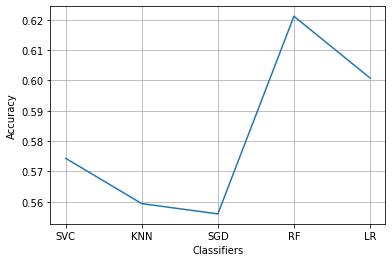

In [62]:
plt.plot(list(acc.keys()),list(acc.values()))
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid()